# Sección 1: Instalación y carga de bibliotecas

In [ ]:
# En Colab no hace falta casi nunca, pero si quieres actualizar paquetes del SO:
!sudo apt-get update && sudo apt-get install -y python3-pip


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,901 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,245 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packa

In [ ]:
!pip install opencv-python matplotlib scikit-image numpy

# Sección 2: Cargar y mostrar una imagen

Usaremos OpenCV para cargar una imagen, y matplotlib para visualizarla. Asegúrate de tener la imagen disponible en tu entorno de trabajo o usar una imagen desde una URL.

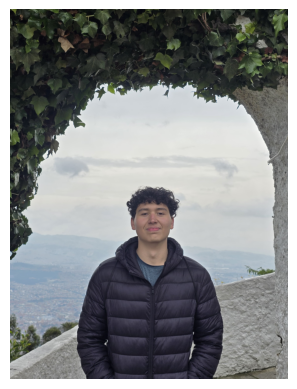

In [ ]:
import cv2
import matplotlib.pyplot as plt
import colorsys            # módulo estándar de Python
from skimage import color  # parte de scikit-image
import numpy as np

# Cargar la imagen en RGB
image = cv2.imread('/content/original.jpg')  # Cambia esta ruta a la correcta

# Convertir de BGR a RGB (OpenCV usa BGR por defecto)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.imshow(image_rgb)
plt.axis('off')  # Quitar los ejes
plt.show()


# Sección 3: Convertir de RGB a otros espacios de color
Aquí convertiremos la imagen de RGB a HSV y CIE Lab, mostrando cómo se modifica la percepción visual en cada uno.

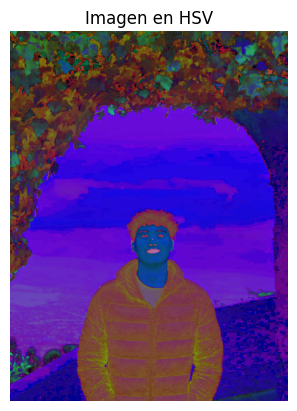

In [ ]:
# Convertir de RGB a HSV
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Mostrar la imagen en el espacio HSV
plt.imshow(image_hsv)
plt.title('Imagen en HSV')
plt.axis('off')
plt.show()


**De RGB a CIE Lab**

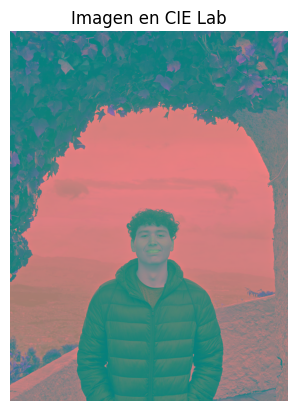

In [ ]:
# Convertir de RGB a CIE Lab
image_lab = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2LAB)

# Mostrar la imagen en el espacio CIE Lab
plt.imshow(image_lab)
plt.title('Imagen en CIE Lab')
plt.axis('off')
plt.show()


# Sección 4: Visualizar los canales de la imagen y su efecto
Los espacios de color como HSV y CIE Lab tienen diferentes canales. Vamos a visualizarlos individualmente.

**Canales HSV**

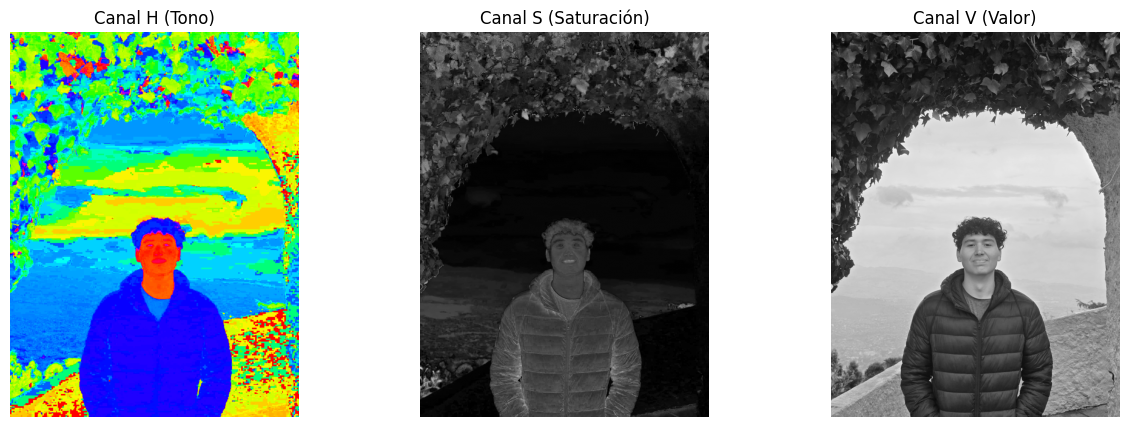

In [ ]:
# Separar los canales en HSV (H: Tono, S: Saturación, V: Valor)
h, s, v = cv2.split(image_hsv)

# Mostrar los canales por separado
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(h, cmap='hsv')
plt.title('Canal H (Tono)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Canal S (Saturación)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Canal V (Valor)')
plt.axis('off')

plt.show()


**Canales CIE Lab**

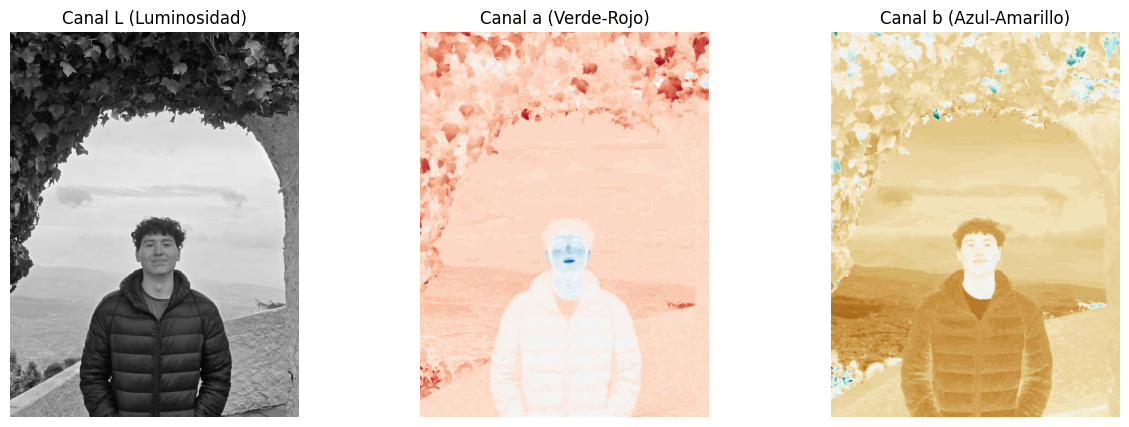

In [ ]:
# Separar los canales en CIE Lab (L: Luminosidad, a: color verde-rojo, b: color azul-amarillo)
l, a, b = cv2.split(image_lab)

# Mostrar los canales por separado
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(l, cmap='gray')
plt.title('Canal L (Luminosidad)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(a, cmap='RdBu')
plt.title('Canal a (Verde-Rojo)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(b, cmap='BrBG')
plt.title('Canal b (Azul-Amarillo)')
plt.axis('off')

plt.show()


# Sección 5: Simulaciones de alteraciones de visión
**Daltonismo (Protanopia y Deuteranopia)**

Simularemos cómo se vería la imagen para personas con daltonismo usando filtros de color.

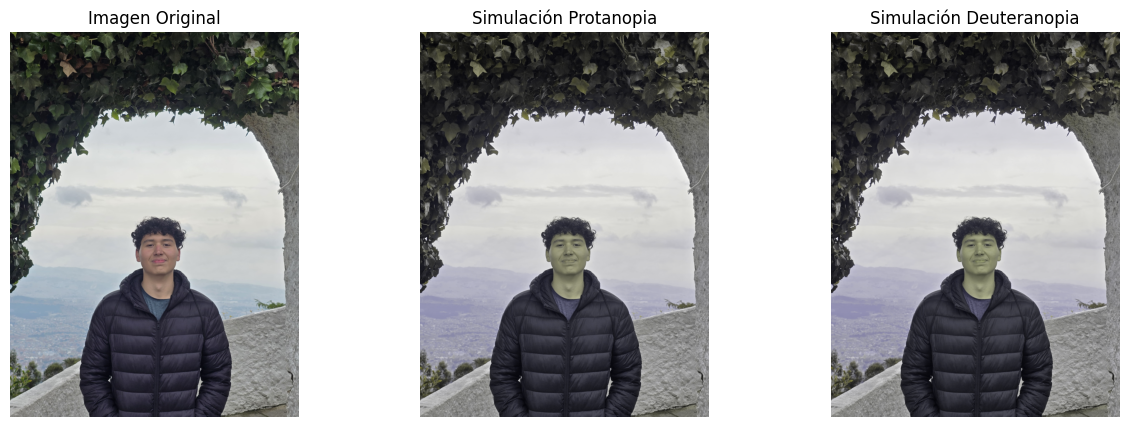

In [ ]:
from skimage import img_as_float, img_as_ubyte
import numpy as np

# Matrices de simulación (igual que antes)
M_PROTANOPIA = np.array([
    [0.567, 0.433, 0.   ],
    [0.558, 0.442, 0.   ],
    [0.   , 0.242, 0.758]
])
M_DEUTERANOPIA = np.array([
    [0.625, 0.375, 0.   ],
    [0.70 , 0.30 , 0.   ],
    [0.   , 0.30 , 0.70 ]
])


def simulate_cb_skimage_show(path_in, mat):
    """
    Carga una imagen, aplica la matriz de simulación de daltonismo y
    la muestra en pantalla con plt.show().
    - path_in: ruta de la imagen de entrada
    - mat: matriz de simulación 3×3 (protanopía o deuteranopía)
    - title: título opcional para la ventana de Matplotlib
    """
    # 1) Carga y normaliza [0..1]
    img = io.imread(path_in)
    img_f = img_as_float(img)        # float en [0,1]

    # 2) Transformación de color
    sim = img_f.dot(mat.T)           # aplica la matriz a cada píxel

    # 3) Clampeo (no es necesario reconvertir a uint8 para plt)
    sim = np.clip(sim, 0, 1)

    return sim

    # Mostrar simulaciones
protanopia = simulate_cb_skimage_show("original.jpg", M_PROTANOPIA)
deuteranopia = simulate_cb_skimage_show("original.jpg", M_DEUTERANOPIA)

# Mostrar las simulaciones
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(protanopia)
plt.title('Simulación Protanopia')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(deuteranopia)
plt.title('Simulación Deuteranopia')
plt.axis('off')

plt.show()


**Reducción de brillo y contraste (baja luz)**

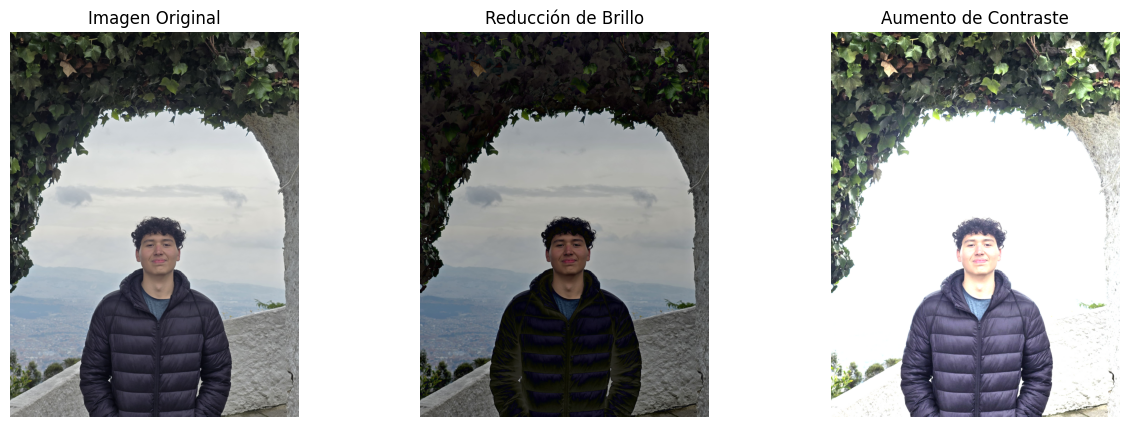

In [ ]:
# Reducir brillo
brillo_reducido = cv2.convertScaleAbs(image_rgb, alpha=1.0, beta=-50)  # beta negativo reduce el brillo

# Aumentar contraste
contrastado = cv2.convertScaleAbs(image_rgb, alpha=2.0, beta=0)  # alpha > 1 aumenta el contraste

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(brillo_reducido)
plt.title('Reducción de Brillo')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(contrastado)
plt.title('Aumento de Contraste')
plt.axis('off')

plt.show()


# Sección 6: Aplicar transformaciones de color (inversión, monocromo)
**Inversión de colores**

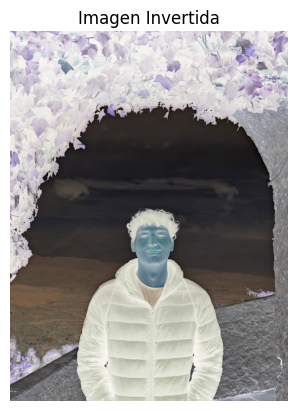

In [ ]:
# Invertir los colores de la imagen
imagen_invertida = cv2.bitwise_not(image_rgb)

# Mostrar la imagen invertida
plt.imshow(imagen_invertida)
plt.title('Imagen Invertida')
plt.axis('off')
plt.show()


**Monocromo (Escala de grises)**

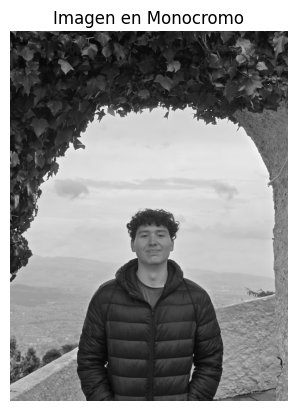

In [ ]:
# Convertir la imagen a escala de grises
imagen_gris = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Mostrar la imagen en monocromo
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen en Monocromo')
plt.axis('off')
plt.show()


# Sección 7: Función para alternar dinámicamente entre simulaciones


In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.9 MB/s eta 0:00:00


In [ ]:
from ipywidgets import interact, widgets

In [ ]:
def alternar_color(image, simulacion='original'):
    if simulacion == 'protanopia':
        return simulate_cb_skimage_show("original.jpg", M_PROTANOPIA)
    elif simulacion == 'deuteranopia':
        return simulate_cb_skimage_show("original.jpg", M_DEUTERANOPIA)
    elif simulacion == 'invertir':
        return cv2.bitwise_not(image)
    elif simulacion == 'monocromo':
        return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:  # Caso por defecto: imagen original
        return image

# Lista de simulaciones disponibles
simulaciones = ['original', 'protanopia', 'deuteranopia', 'invertir', 'monocromo']

@interact(sim = widgets.Dropdown(
    options=simulaciones,
    value='original',
    description='Simulación:',
    style={'description_width':'initial'}
))
def mostrar_simulacion(sim):
    # Aplica la transformación
    img = alternar_color(image_rgb, simulacion=sim)

    # Ajusta colormap si es monocromo
    cmap = 'gray' if sim == 'monocromo' else None

    # Renderiza
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap=cmap)
    plt.title(f"Simulación: {sim}", pad=15)
    plt.axis('off')
    plt.show()
